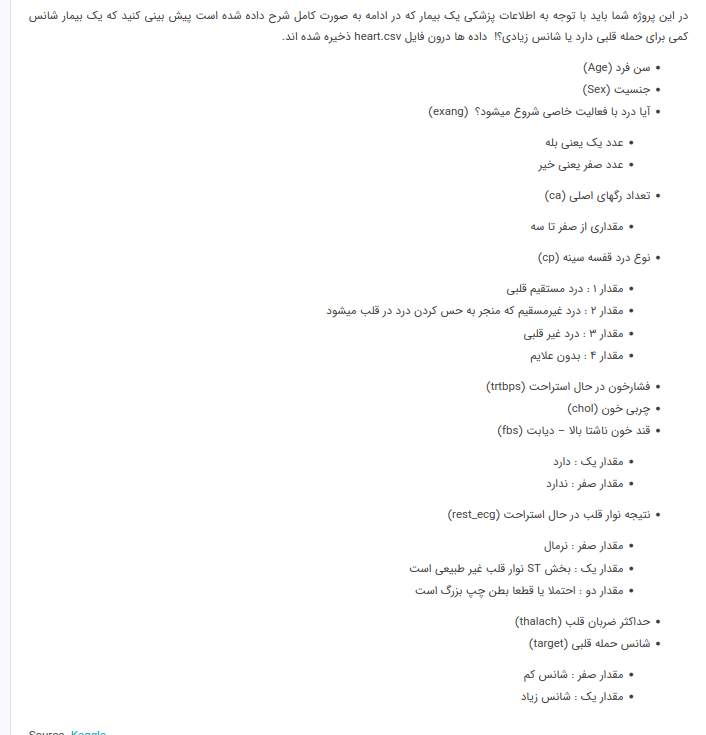

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
%matplotlib inline
import seaborn as sns
from matplotlib.cm import rainbow

In [2]:
df= pd.read_csv('16325569497737558.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df['output'].value_counts()

1    165
0    138
Name: output, dtype: int64

In [4]:
df.shape

(303, 14)

In [5]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
df.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

In [7]:
df['oldpeak'].value_counts()

0.0    99
1.2    17
1.0    14
0.6    14
1.4    13
0.8    13
0.2    12
1.6    11
1.8    10
0.4     9
2.0     9
0.1     7
2.8     6
2.6     6
1.5     5
3.0     5
1.9     5
0.5     5
3.6     4
2.2     4
2.4     3
0.9     3
3.4     3
4.0     3
0.3     3
2.3     2
3.2     2
2.5     2
4.2     2
1.1     2
3.1     1
0.7     1
3.5     1
6.2     1
1.3     1
5.6     1
2.9     1
2.1     1
3.8     1
4.4     1
Name: oldpeak, dtype: int64

In [8]:
df['oldpeak'].describe()

count    303.000000
mean       1.039604
std        1.161075
min        0.000000
25%        0.000000
50%        0.800000
75%        1.600000
max        6.200000
Name: oldpeak, dtype: float64

In [9]:
df=df.convert_dtypes()
df.dtypes

age           Int64
sex           Int64
cp            Int64
trtbps        Int64
chol          Int64
fbs           Int64
restecg       Int64
thalachh      Int64
exng          Int64
oldpeak     Float64
slp           Int64
caa           Int64
thall         Int64
output        Int64
dtype: object

In [10]:
df.isnull().values.any()

False

In [11]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exng,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [12]:
df.groupby('output').mean()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
output,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.15942,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.49697,0.563636,1.375758,129.30303,242.230303,0.139394,0.593939,158.466667,0.139394,0.58303,1.593939,0.363636,2.121212


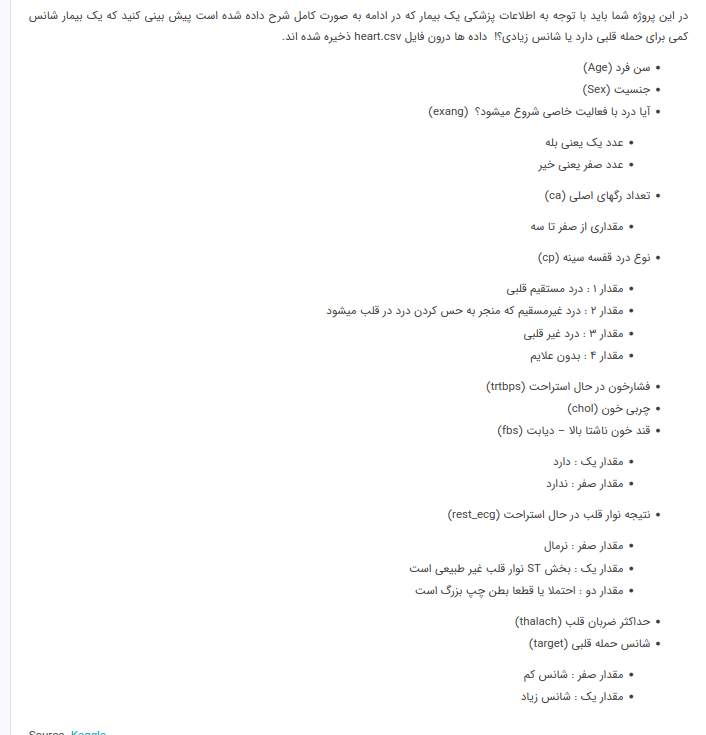

/home/amir/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='output', ylabel='count'>

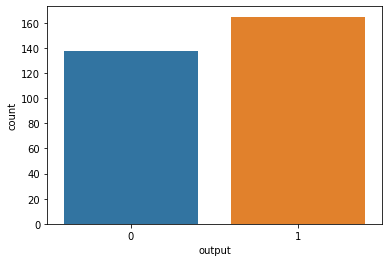

In [13]:
sns.countplot(df['output'], label='Count')

In [14]:
# plt.figure(figsize=(25,8))
sns.pairplot(df,hue='output', height=10, aspect=8/10, corner=True)
sns.set(font_scale=8)

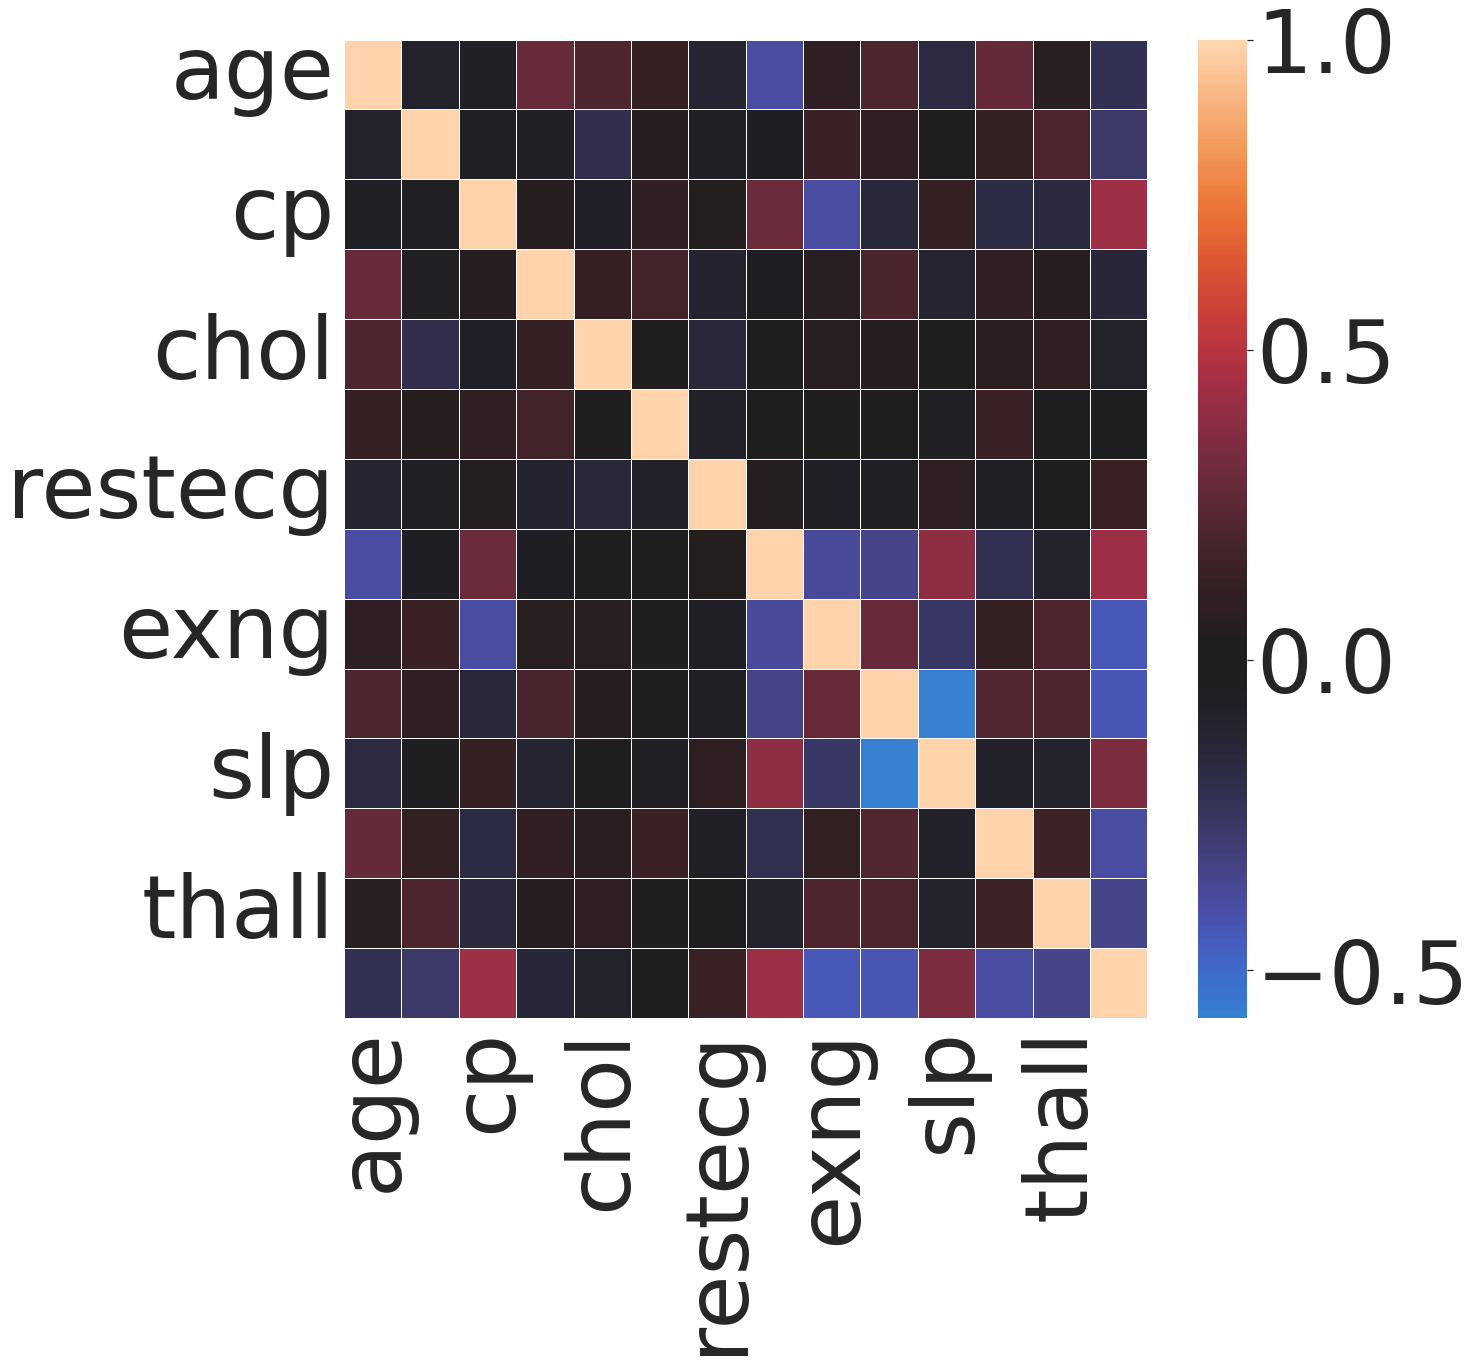

In [15]:
plt.figure(figsize=(18,18))
sns.heatmap(df.corr(), center=0,linewidths=0.5)
plt.show()

In [16]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [17]:
X=df[['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh','exng', 'oldpeak', 'slp', 'caa', 'thall']].values

In [18]:
y=df['output'].values
y=y.astype('int')
y[0:5]

array([1, 1, 1, 1, 1])

In [19]:
scaler=preprocessing.StandardScaler()
X=scaler.fit(X).transform(X.astype(float))
X[0:5]

array([[ 0.9521966 ,  0.68100522,  1.97312292,  0.76395577, -0.25633371,
         2.394438  , -1.00583187,  0.01544279, -0.69663055,  1.08733806,
        -2.27457861, -0.71442887, -2.14887271],
       [-1.91531289,  0.68100522,  1.00257707, -0.09273778,  0.07219949,
        -0.41763453,  0.89896224,  1.63347147, -0.69663055,  2.12257273,
        -2.27457861, -0.71442887, -0.51292188],
       [-1.47415758, -1.46841752,  0.03203122, -0.09273778, -0.81677269,
        -0.41763453, -1.00583187,  0.97751389, -0.69663055,  0.31091206,
         0.97635214, -0.71442887, -0.51292188],
       [ 0.18017482,  0.68100522,  0.03203122, -0.66386682, -0.19835726,
        -0.41763453,  0.89896224,  1.23989692, -0.69663055, -0.20670527,
         0.97635214, -0.71442887, -0.51292188],
       [ 0.29046364, -1.46841752, -0.93851463, -0.66386682,  2.08204965,
        -0.41763453,  0.89896224,  0.58393935,  1.43548113, -0.37924438,
         0.97635214, -0.71442887, -0.51292188]])

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.15, random_state=4)
print('train set: ', X_train.shape, y_train.shape)
print('test set: ', X_test.shape, y_test.shape)

train set:  (257, 13) (257,)
test set:  (46, 13) (46,)


### KNN

In [21]:
from sklearn.neighbors import KNeighborsClassifier

In [22]:
k = 8 
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)

In [23]:
yhat=neigh.predict(X_test)
print(yhat[0:5])

[0 0 1 1 0]


In [24]:
from sklearn import metrics
print('train set accuracy: ','%.4f' %metrics.accuracy_score(y_train,neigh.predict(X_train)))
print('test set accuracy: ', '%.4f' %metrics.accuracy_score(y_test,yhat))

train set accuracy:  0.8677
test set accuracy:  0.8696


In [25]:
#test other k s
ks=30
mean_acc= np.zeros((ks-1))
std_acc= np.zeros((ks-1))
list_mean=[]
# list_std=[]
for n in range(1,ks):
    neigh = KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc=metrics.accuracy_score(y_test,yhat)
    std_acc=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
    list_mean.append([mean_acc,n])
#     list_std.append([std_acc,n])
print('mean acc,  k: ',max(list_mean))
# print('std acc: ',min(list_std))

mean acc,  k:  [0.8913043478260869, 24]


In [26]:
#test other k s
ks=30
mean_acc= np.zeros((ks-1))
std_acc= np.zeros((ks-1))
# list_mean=[]
# list_std=[]
for n in range(1,ks):
    neigh = KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1]=metrics.accuracy_score(y_test,yhat)
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
#     list_mean.append([mean_acc,n])
#     list_std.append([std_acc,n])
# print('mean acc,  k: ',max(list_mean))
# print('std acc: ',min(list_std))

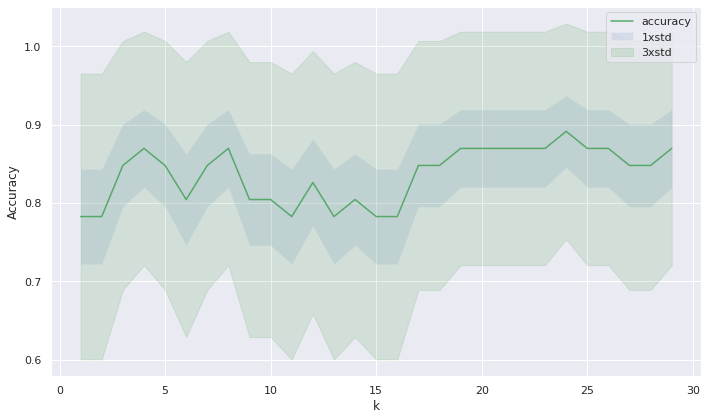

In [27]:
plt.figure(figsize=(10,6))
sns.set(font_scale=1)
plt.plot(range(1,ks),mean_acc,'g')
plt.fill_between(range(1,ks),mean_acc-std_acc,mean_acc+std_acc, alpha=0.12)
plt.fill_between(range(1,ks),mean_acc-3*std_acc,mean_acc+3*std_acc, alpha=0.1, color='green')
plt.legend(('accuracy','1xstd','3xstd'))
plt.ylabel('Accuracy')
plt.xlabel('k')
plt.tight_layout()
plt.show()


In [28]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

The best accuracy was with 0.8913043478260869 with k= 24


### Decision tree

In [51]:
df= pd.read_csv('16325569497737558.csv')

In [52]:
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [53]:
df.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

In [54]:
y=df['output'].astype('int')

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
Xtrain, Xtest,ytrain,ytest= train_test_split(X,y,test_size=0.2, random_state=5)

In [57]:
print(Xtrain.shape)
print(Xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(242, 13)
(61, 13)
(242,)
(61,)


In [58]:
from sklearn.tree import DecisionTreeClassifier

In [59]:
hearttree=DecisionTreeClassifier(criterion='entropy',max_depth=None)
hearttree

DecisionTreeClassifier(criterion='entropy')

In [60]:
hearttree.fit(Xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy')

In [61]:
predtree=hearttree.predict(Xtest)

In [62]:
print(predtree[0:5])
print(ytest[0:5])

[1 0 0 0 1]
302    0
243    0
268    0
213    0
24     1
Name: output, dtype: int64


In [63]:
from sklearn import metrics
print('DTree Accuracy: ', metrics.accuracy_score(ytest,predtree))

DTree Accuracy:  0.819672131147541


In [64]:
#test size opt
acc=[]
k=np.arange(0.1,0.51,0.02)
for testsizes in k:
    Xtrain, Xtest,ytrain,ytest= train_test_split(X,y,test_size=testsizes, random_state=5)
    hearttree.fit(Xtrain,ytrain)
    predtree=hearttree.predict(Xtest)
    acc.append([metrics.accuracy_score(ytest,predtree),testsizes])
print('[opted_ACC, opted_test_size] =',max(acc, key=lambda x: x[0]))

[opted_ACC, opted_test_size] = [0.9032258064516129, 0.1]


### Logistic Reg

In [50]:
df= pd.read_csv('16325569497737558.csv')

In [66]:
import pylab as pl
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline
import matplotlib.pyplot as plt

In [68]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [69]:
df.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

In [70]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [71]:
X= np.asarray(df[['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh','exng', 'oldpeak', 'slp', 'caa', 'thall']])
X[0:5]

array([[ 63. ,   1. ,   3. , 145. , 233. ,   1. ,   0. , 150. ,   0. ,
          2.3,   0. ,   0. ,   1. ],
       [ 37. ,   1. ,   2. , 130. , 250. ,   0. ,   1. , 187. ,   0. ,
          3.5,   0. ,   0. ,   2. ],
       [ 41. ,   0. ,   1. , 130. , 204. ,   0. ,   0. , 172. ,   0. ,
          1.4,   2. ,   0. ,   2. ],
       [ 56. ,   1. ,   1. , 120. , 236. ,   0. ,   1. , 178. ,   0. ,
          0.8,   2. ,   0. ,   2. ],
       [ 57. ,   0. ,   0. , 120. , 354. ,   0. ,   1. , 163. ,   1. ,
          0.6,   2. ,   0. ,   2. ]])

In [74]:
y=np.asarray(df['output'])
y[0:5]

array([1, 1, 1, 1, 1])

In [76]:
from sklearn import preprocessing
scaler=preprocessing.StandardScaler()
X=scaler.fit(X).transform(X)
X[0:5]

array([[ 0.9521966 ,  0.68100522,  1.97312292,  0.76395577, -0.25633371,
         2.394438  , -1.00583187,  0.01544279, -0.69663055,  1.08733806,
        -2.27457861, -0.71442887, -2.14887271],
       [-1.91531289,  0.68100522,  1.00257707, -0.09273778,  0.07219949,
        -0.41763453,  0.89896224,  1.63347147, -0.69663055,  2.12257273,
        -2.27457861, -0.71442887, -0.51292188],
       [-1.47415758, -1.46841752,  0.03203122, -0.09273778, -0.81677269,
        -0.41763453, -1.00583187,  0.97751389, -0.69663055,  0.31091206,
         0.97635214, -0.71442887, -0.51292188],
       [ 0.18017482,  0.68100522,  0.03203122, -0.66386682, -0.19835726,
        -0.41763453,  0.89896224,  1.23989692, -0.69663055, -0.20670527,
         0.97635214, -0.71442887, -0.51292188],
       [ 0.29046364, -1.46841752, -0.93851463, -0.66386682,  2.08204965,
        -0.41763453,  0.89896224,  0.58393935,  1.43548113, -0.37924438,
         0.97635214, -0.71442887, -0.51292188]])

In [77]:
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2, random_state=5)
print('train: ',Xtrain.shape, ytrain.shape)
print('test: ',Xtest.shape, ytest.shape)

train:  (242, 13) (242,)
test:  (61, 13) (61,)


In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix


In [80]:
LR=LogisticRegression(C=0.01, solver='liblinear').fit(Xtrain,ytrain)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [81]:
yhat=LR.predict(Xtest)
yhat

array([1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0])

In [82]:
yhat_prob=LR.predict_proba(Xtest)
yhat_prob[0:10]

array([[0.3235295 , 0.6764705 ],
       [0.82856114, 0.17143886],
       [0.82906123, 0.17093877],
       [0.64449175, 0.35550825],
       [0.36035326, 0.63964674],
       [0.74706263, 0.25293737],
       [0.40106795, 0.59893205],
       [0.82660715, 0.17339285],
       [0.24411635, 0.75588365],
       [0.38208631, 0.61791369]])

In [88]:
#Jaccard evaluation
from sklearn.metrics import jaccard_score
jaccard_score(ytest,yhat, pos_label=1)

0.8285714285714286

In [112]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.grid(False)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(ytest,yhat, labels=[1,0]))

[[29  2]
 [ 4 26]]


Confusion matrix, without normalization
[[29  2]
 [ 4 26]]


/tmp/ipykernel_26667/1002664282.py:15: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


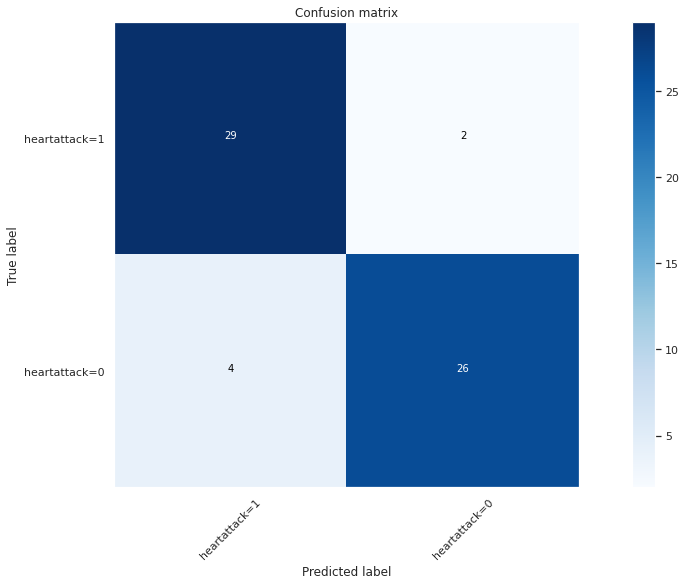

In [116]:
cnf_matrix=confusion_matrix(ytest,yhat, labels=[1,0])
np.set_printoptions(precision=2)
plt.figure(figsize=(15,8))
# plt.figtext(1,1,20)
# plt.grid(False)
plot_confusion_matrix(cnf_matrix,classes=['heartattack=1','heartattack=0'],normalize=False)

In [118]:
print(classification_report(ytest,yhat))

              precision    recall  f1-score   support

           0       0.93      0.87      0.90        30
           1       0.88      0.94      0.91        31

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



In [121]:
#logloss evaluation
from sklearn.metrics import log_loss
log_loss(ytest,yhat_prob)

0.4249930273378339